In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

In [3]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
data.shape
# Data comprises of 500 rows and 9 columns

(500, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.drop(columns="Serial No.", inplace = True)
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
# As can be seen, the columns LOR and Chance of Admit have an extra space at the end. Hence, the extra space needs to be trimmed
x = []
for i in range(len(data.columns)):
    x.append(data.columns[i].strip())
data.columns = x

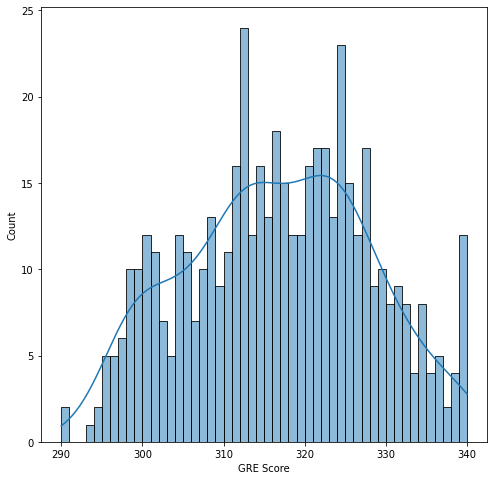

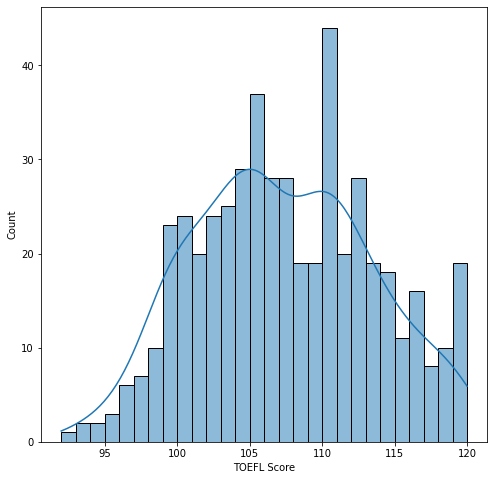

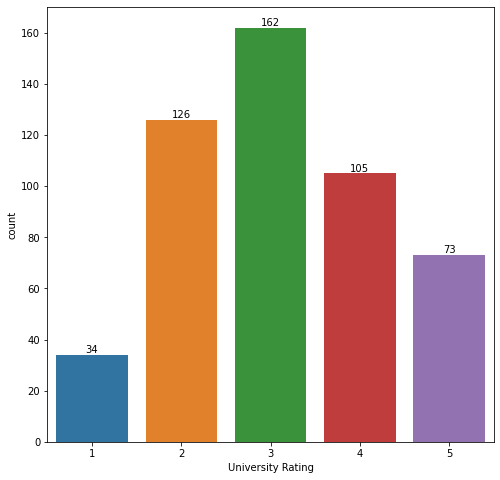

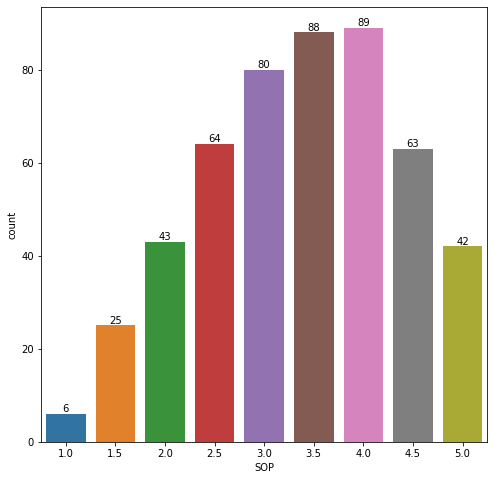

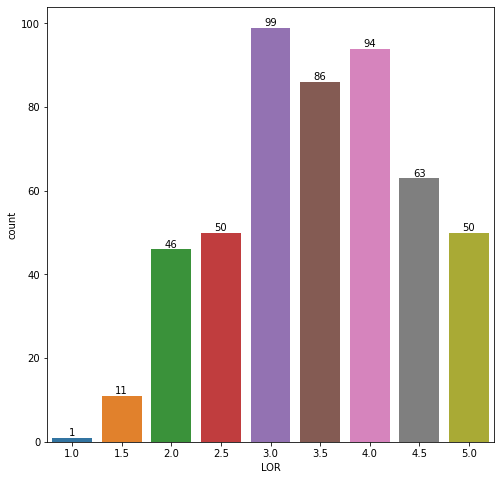

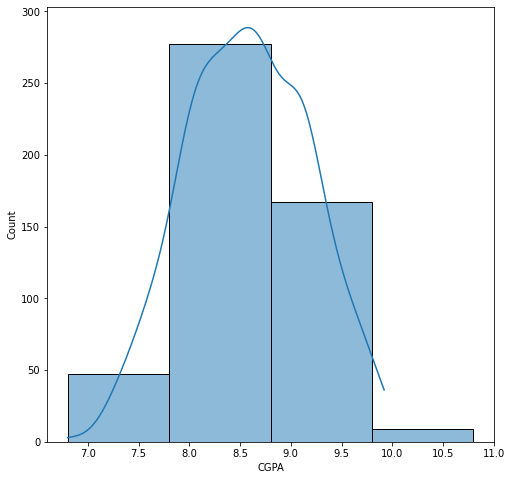

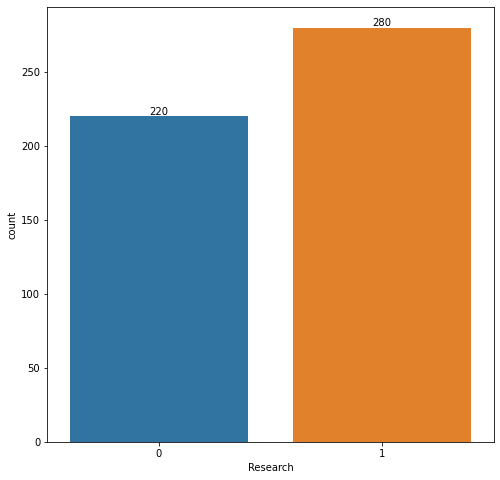

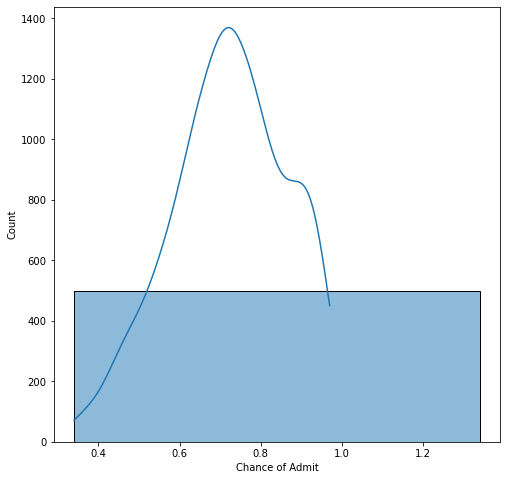

In [19]:
cat = ["University Rating", "Research", "SOP","LOR"]
for i in data.columns:
    if i in cat:
        plt.figure(figsize = (8,8))
        ax = sns.countplot(data[i])
        plt.xlabel(i)
        plt.bar_label(ax.containers[0])
        plt.show()
    else:
        plt.figure(figsize = (8,8))
        sns.histplot(data[i], kde = True, binwidth=1)
        plt.xlabel(i)
        plt.show()
# The GRE Score appears to be approximately bell curved and symmetric with a mean of 316.47 and a median of 317.
# The TOEFL Score appears to be approximately bell curved and symmetric with a mean and median of approx 107. It appears to be 
# slightly right skewed and hence the mean > median. 
# Out of 500 students,34 are from university of rating 1, 126 of rating 2, 162 of rating 3, 105 of rating 4, 73 of rating 5.
# The SOP and LOR rating appears to be left skewed. 
# Out of 500 students, 220 have no research experience whereas 280 have more research experience

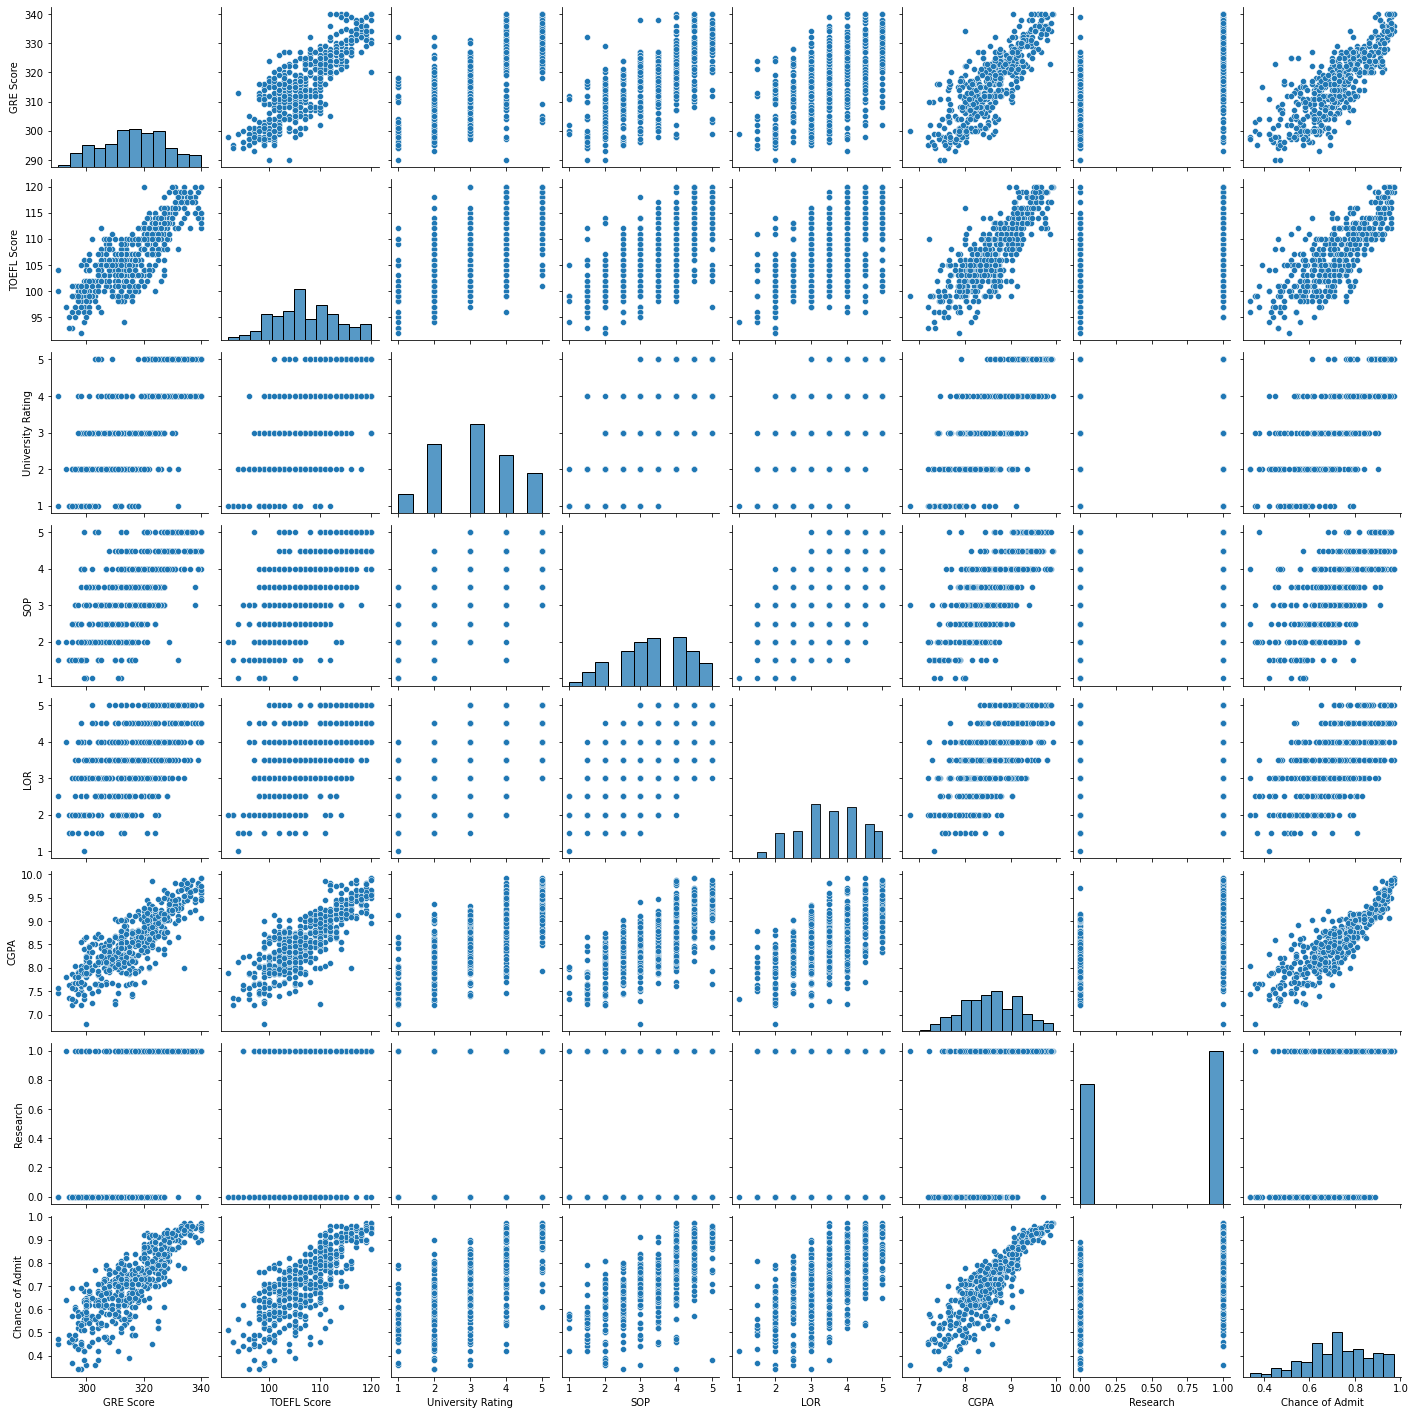

In [22]:
sns.pairplot(data)
plt.show()
# The TOEFL score, GRE score and CGPA are highly correlated to each other and to the CHances of Admit. 

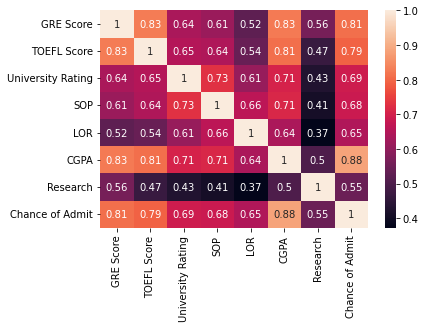

In [46]:
sns.heatmap(data.corr(), annot=True)
plt.show()
# Students with higher GRE Scores, TOEFL Scores, University Rating, SOP scores, LOR scores and CGPA 
# tend to have higher chances of Admit.
# The correaltion of GRE Scores, TOEFL scores and CGPA are very high with the chances of admit.
# University rating, SOP, LOR and Research are moderately correlated to Chances of admit.

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

<Figure size 576x576 with 0 Axes>

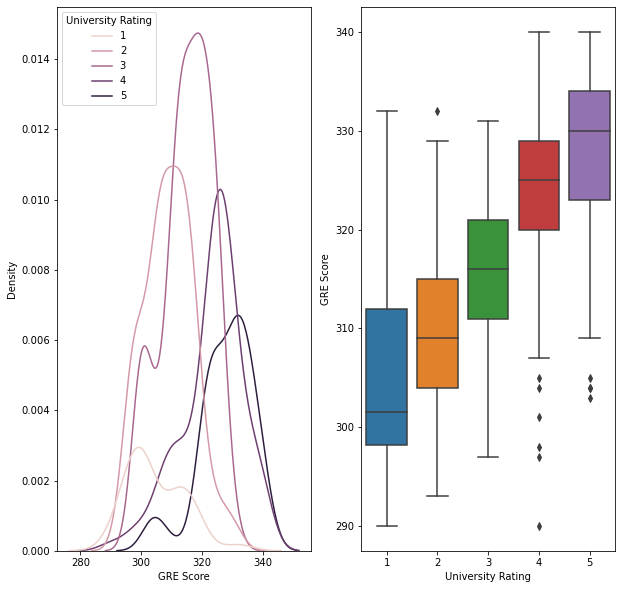

In [61]:
plt.figure(figsize =( 8,8))
plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
sns.kdeplot(data["GRE Score"], hue = data["University Rating"])
plt.subplot(1,2,2)
sns.boxplot(y = data["GRE Score"], x = data["University Rating"])
# From the plot below, it appears mean of GRE scores scored by students increases with increase in university rating.
# The same needs to be validated via Hypothesis Testing

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

<Figure size 576x576 with 0 Axes>

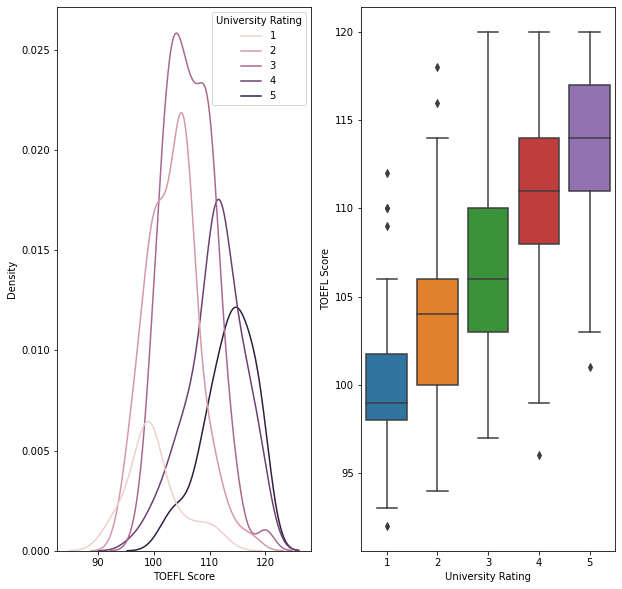

In [60]:
plt.figure(figsize =( 8,8))
plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
sns.kdeplot(data["TOEFL Score"], hue = data["University Rating"])
plt.subplot(1,2,2)
sns.boxplot(y = data["TOEFL Score"], x = data["University Rating"])
# From the plot below, it appears mean of TOEFL scores scored by students increases with increase in university rating.
# The same needs to be validated via Hypothesis Testing

<AxesSubplot:xlabel='University Rating', ylabel='SOP'>

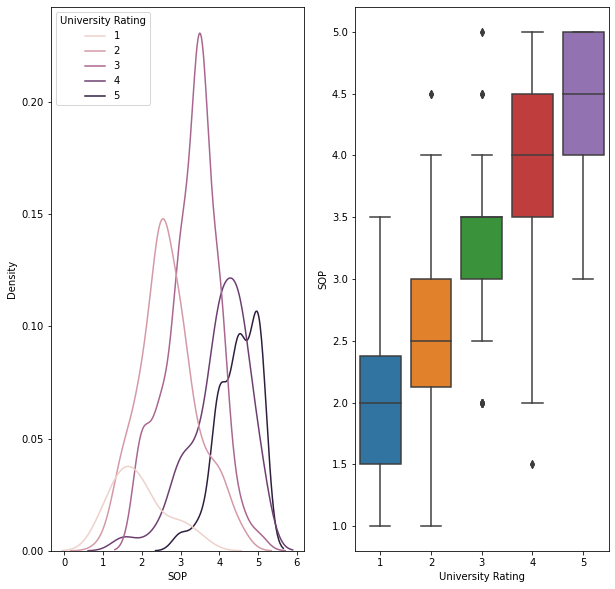

In [56]:
plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
sns.kdeplot(data["SOP"], hue = data["University Rating"])
plt.subplot(1,2,2)
sns.boxplot(y = data["SOP"], x = data["University Rating"])

# From the plot below, it appears mean of SOP scores of students increases with increase in university rating.
# The same needs to be validated via Hypothesis Testing

<AxesSubplot:xlabel='University Rating', ylabel='LOR'>

<Figure size 576x576 with 0 Axes>

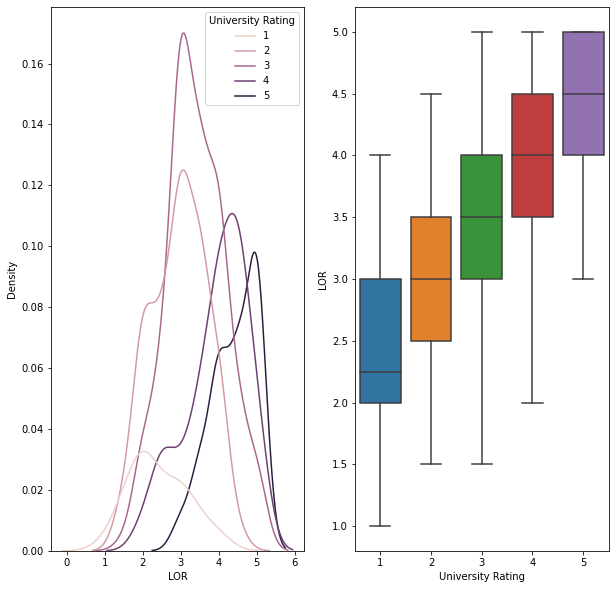

In [57]:
plt.figure(figsize =( 8,8))
plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
sns.kdeplot(data["LOR"], hue = data["University Rating"])
plt.subplot(1,2,2)
sns.boxplot(y = data["LOR"], x = data["University Rating"])

# From the plot below, it appears mean of LOR scores of students increases with increase in university rating.
# The same needs to be validated via Hypothesis Testing

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

<Figure size 576x576 with 0 Axes>

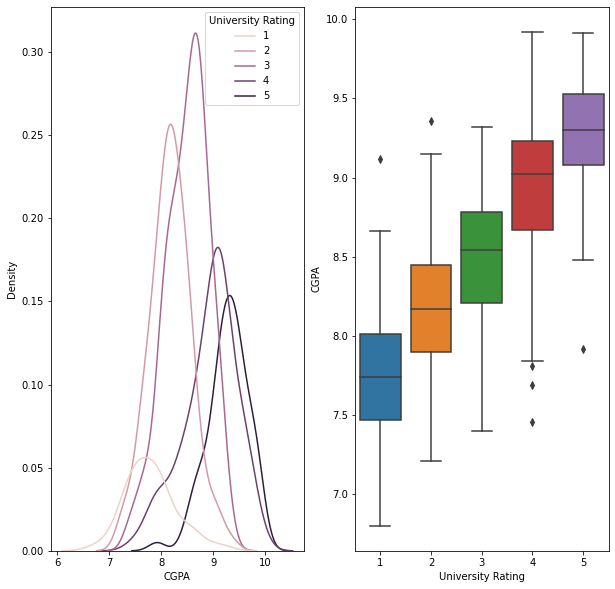

In [59]:
plt.figure(figsize =( 8,8))
plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
sns.kdeplot(data["CGPA"], hue = data["University Rating"])
plt.subplot(1,2,2)
sns.boxplot(y = data["CGPA"], x = data["University Rating"])
# From the plot below, it appears mean of CGPA scores of students increases with increase in university rating.
# The same needs to be validated via Hypothesis Testing